# Text compression

Zadanie polega na implementacji dwóch algorytmów kompresji:

1. statycznego algorytmu Huffmana (1 punkt)
2. dynamicznego algorytmu Huffmana (2 punkty)

Dla każdego z algorytmów należy wykonać następujące zadania:

1. Opracować format pliku przechowującego dane.
2. Zaimplementować algorytm kompresji i dekompresji danych dla tego formatu pliku.
3. Zmierzyć współczynnik kompresji (wyrażone w procentach: 1 - plik_skompresowany / plik_nieskompresowany) dla plików tekstowych o rozmiarach: 1kB, 10kB, 100kB, 1MB, dla różnych typów plików: plik tekstowy z portalu Guttenberga, plik źródłowy z Githubu, plik ze znakami losowanymi z rozkładu jednostajnego.
4. Zmierzyć czas kompresji i dekompresji dla plików z punktu 3 dla każdego algorytmu.

## 1. Static Huffman Coding

In [1]:
def count_letters(text):
    letters = {}   # keys - letters, values - number of occurences
    for l in text:
        # value to be returned if the key is not found is 0
        letters[l] = 1 + letters.get(l,0)
    return letters

In [2]:
class Node():
    def __init__(self, letter = '*', weight = 0, left = None, right = None, parent = None):
        self.letter = letter
        self.weight = weight
        self.left = left
        self.right = right
        self.parent = parent
    def __repr__(self):
        return str(self.letter) + ':' + str(self.weight)
    
    def swap(node1, node2):
        if node1 == node2 or node1.parent == node2 or node2.parent == node1:
            return
        if node1.parent==node2.parent:
            if node1.parent.left == node1:
                node1.parent.left = node2
                node1.parent.right = node1
            else:
                node1.parent.left = node1
                node1.parent.right = node2
            return
        node1p = node1.parent
        node2p = node2.parent
        if node1 == node1p.left:
            node1p.left = node2
        else:
            node1p.right = node2
        if node2 == node2p.left:
            node2p.left = node1
        else:
            node2p.right = node1
        node1.parent = node2p
        node2.parent = node1p

In [3]:
def Huffmann(text):
    leafs = []
    letters = count_letters(text)
    for l,weight in letters.items():
        leafs.append(Node(l,weight))
        
    leafs = sorted(leafs, key = lambda x: x.weight)  # sort by weight
    

    internal_nodes = []   # always sorted incrementally
    
    while (len(internal_nodes) + len(leafs)) > 1:
        
        # 2 min weight elements from both leafs and internal_nodes
        min_internal = internal_nodes[:2]
        min_leafs = leafs[:2]
        
        min_el = min_internal + min_leafs
        [left,right] = sorted(min_el, key = lambda x: x.weight)[:2]
                
        # remove left from list
        if leafs and left == leafs[0]:
            leafs.pop(0)       
        else:
            internal_nodes.pop(0)
            
        # remove right 
        if leafs and right == leafs[0]:
            leafs.pop(0)
        else:
            internal_nodes.pop(0)
        
        internal_nodes.append(Node(weight = left.weight + right.weight, left = left, right = right))
        
    
    return internal_nodes[0]

### Auxiliary function to print Huffman Tree

In [4]:
def display_tree(root):

    def print_tree(root):
            """Returns list of strings, width, height, and horizontal coordinate of the root."""
            # No child.
            if root.right is None and root.left is None:
                line = '%s' % root.letter + ':' + str(root.weight)
                width = len(line)
                height = 1
                middle = width // 2
                return [line], width, height, middle

            # Only left child.
            if root.right is None:
                lines, n, p, x = print_tree(root.left)
                s = '%s' % root.letter + ':' + str(root.weight)
                u = len(s)
                first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
                second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
                shifted_lines = [line + u * ' ' for line in lines]
                return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

            # Only right child.
            if root.left is None:
                lines, n, p, x = print_tree(root.right)
                s = '%s' % root.letter + ':' + str(root.weight)
                u = len(s)
                first_line = s + x * '_' + (n - x) * ' '
                second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
                shifted_lines = [u * ' ' + line for line in lines]
                return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

            # Two children.
            left, n, p, x = print_tree(root.left)
            right, m, q, y = print_tree(root.right)
            s = '%s' % root.letter + ':' + str(root.weight)
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
            second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
            if p < q:
                left += [n * ' '] * (q - p)
            elif q < p:
                right += [m * ' '] * (p - q)
            zipped_lines = zip(left, right)
            lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
            return lines, n + m + u, max(p, q) + 2, n + u // 2
        
    print()
    lines, _, _, _ = print_tree(root)
    for line in lines:
        print(line)
    print()

### 1. Example Huffman Tree - "abracadabra"

In [5]:
text1 = "abracadabra"
root1 = Huffmann(text1)
display_tree(root1)


  _*:11____                 
 /         \                
a:5      _*:6__________     
        /              \    
       r:2        ____*:4_  
                 /        \ 
               _*:2_     b:2
              /     \       
             c:1   d:1      



### 2. Example Huffman Tree - "aaaaaaabbbbbbbaaaaaaaaaaaaaa"

In [6]:
text2 = "aaaaaaabbbbbbbaaaaaaaaaaaaaa"
root2 = Huffmann(text2)
display_tree(root2)


  _*:28__  
 /       \ 
b:7    a:21



### 3. Example Huffman Tree - random string

In [7]:
text3 = "asmfscknajmwagjfkhmiowesanudhgsimdhsmkasgefsdbkuysgrfjhcalwdablfkj"
root3 = Huffmann(text3)
display_tree(root3)


                         ___________________________________*:66__________________                                            
                        /                                                         \                                           
                  ____*:30_______________________                           ____*:36______________________________            
                 /                               \                         /                                      \           
     __________*:14_                 __________*:16____              ____*:16_                              ____*:20_____     
    /               \               /                  \            /         \                            /             \    
  _*:7____         a:7         ____*:8____           _*:8_        _*:8_      s:8         ________________*:10_        _*:10_  
 /        \                   /           \         /     \      /     \                /                     

### Encoding 

##### Get codes of every letter

In [8]:
def get_codes(root,code,codes):
    if not root: 
        return
    if root.letter != "*":
        codes[root.letter] = code
    get_codes(root.left, code + "0", codes)
    get_codes(root.right, code + "1", codes)

In [9]:
codes = {}
get_codes(root1, "", codes)
codes

{'a': '0', 'r': '10', 'c': '1100', 'd': '1101', 'b': '111'}

##### Encode text using above letter codes

In [10]:
def encode(text, root):
    codes = {}
    get_codes(root, "", codes)
    
    result = ""
    for letter in text:
        result += codes[letter]
        
    return result

### Decoding 

In [11]:
def decode(root, code):
    result = ""
    curr = root
    for c in code:
        if c == "0":
            curr = curr.left
        else:
            curr = curr.right
        if curr.letter != "*":
            result += curr.letter
            curr = root
            
    return result

### Example

##### 1. "abracadabra"

In [12]:
e1 = encode(text1, root1)
e1

'01111001100011010111100'

In [13]:
decode(root1, e1)

'abracadabra'

##### 2. "aaaaaaabbbbbbbaaaaaaaaaaaaaa"

In [14]:
e2 = encode(text2, root2)
e2

'1111111000000011111111111111'

In [15]:
decode(root2, e2)

'aaaaaaabbbbbbbaaaaaaaaaaaaaa'

##### 3."asmfscknajmwagjfkhmiowesanudhgsimdhsmkasgefsdbkuysgrfjhcalwdablfkj"

In [16]:
e3 = encode(text3, root3)
e3

'0011011101111010100010111100011001011011010000001011101101110111110001101010001100110000001001101001000110101010011000011110101000110110011000101110111110011010111010011110101100101011111101010110011110101111100101110011010000001000111000000010010010101111000111011110110'

In [17]:
decode(root3, e3)

'asmfscknajmwagjfkhmiowesanudhgsimdhsmkasgefsdbkuysgrfjhcalwdablfkj'

## 2. Dynamic Huffman Coding

In [18]:
from queue import Queue

In [19]:
class AdaptiveHuffmanTree:
    def __init__(self):
        self.root = Node("NYT")
        self.NYT = self.root
        self.leafs = {}
        self.nodes = []
        self.codes = {}
        self.update_codes(self.root,"", self.codes)

    def get_codes(self):
        return self.codes
        
    # codes = {}
    # update_codes("", codes)
    def update_codes(self,root,code,codes):  
        if not root: 
            return
        if root.letter != "*" and root.letter != None:
            codes[root.letter] = code
        self.update_codes(root.left, code + "0", codes)
        self.update_codes(root.right, code + "1", codes)
        
    def divide_NYT(self, new_node):
        new_NYT = Node("NYT")
        self.NYT.left = new_NYT
        self.NYT.right = new_node
        self.NYT.letter = None
        new_node.parent = self.NYT
        new_NYT.parent = self.NYT
        self.NYT = new_NYT

    def find_leader(self, node: Node):
        idx = node.index
        while idx > 0 and node.weight > self.nodes[idx - 1].weight:
            idx -= 1
        return self.nodes[idx]

    def update_indexes(self):
        self.nodes = []
        queue = Queue()
        queue.put(self.root)
        index = 0
        while not queue.empty():
            node = queue.get()
            self.nodes.append(node)
            node.index = index
            if node.right is not None:
                queue.put(node.right)
            if node.left is not None:
                queue.put(node.left)
            index += 1

    def increment(self, node):
        f = False
        while node is not None:
            node.weight += 1
            leader = self.find_leader(node)
            if not (leader == node or node.parent == leader or leader.parent == node):
                Node.swap(node, leader)
                self.update_indexes()
                f = True
            node = node.parent
        return f

    def add_letter(self, letter):
        if letter in self.leafs.keys():
            f = self.increment(self.leafs[letter])

        else:
            new_node = Node(letter, 1)
            self.leafs[letter] = new_node
            self.divide_NYT(new_node)
            
            new_parent = new_node.parent
            new_parent.index = len(self.nodes)
            
            self.nodes.append(new_parent)
            new_node.index = len(self.nodes)
            
            self.nodes.append(new_node)
            self.increment(new_parent)
            
            f = True
        if f:
            self.update_codes(self.root,"",self.codes)
            
        return f

In [20]:
def build_tree(text):
    tree = AdaptiveHuffmanTree()

    for letter in text:
        tree.add_letter(letter)
    return tree.root

### 1. Example Adaptive Huffman Tree - "abracadabra"

In [21]:
text1 = "abracadabra"
root1 = build_tree(text1)
display_tree(root1)


  _None:11__________________________               
 /                                  \              
a:5                         _____None:6______      
                           /                 \     
                   _____None:2_          _None:4_  
                  /            \        /        \ 
             __None:1_        c:1      r:2      b:2
            /         \                            
          NYT:0      d:1                           



### 2. Example Adaptive Huffman Tree - "aaaaaaabbbbbbbaaaaaaaaaaaaaa"

In [22]:
text2 = "aaaaaaabbbbbbbaaaaaaaaaaaaaa"
root2 = build_tree(text2)
display_tree(root2)


         _____None:28__  
        /              \ 
   __None:7_         a:21
  /         \            
NYT:0      b:7           



### 3. Example Adaptive Huffman Tree - random string

In [23]:
text3 = "asmfscaaaffdzqaafdsghjfyjsfdsffsdfsfdkj"
root3 = build_tree(text3)
display_tree(root3)


       __________________________________________None:39_______                                                                
      /                                                        \                                                               
  _None:16_________________________________                _None:23______                                                      
 /                                         \              /              \                                                     
s:7                       ______________None:9_         f:10         _None:13______                                            
                         /                     \                    /              \                                           
                 _____None:4______            d:5                  a:6         _None:7__________________________               
                /                 \                                           /                        

### Encoding
* if NYT symbol encountered add code of NYT and then its generic code
* if symbol is in tree trasmit code for its leaf node

In [24]:
def encode_adaptive(text):
    tree = AdaptiveHuffmanTree()
    res = ""
    codes = {"NYT":"0"}
    for letter in text:

        if tree.add_letter(letter):
            res += codes["NYT"]
            codes = tree.codes.copy()
            bits = bin(ord(letter))[2:].zfill(8)   # converts letter to bits
            res += bits
        res += codes[letter]
    return res             

### Decoding

In [25]:
def decode_adaptive(code):
    tree = AdaptiveHuffmanTree()
    i = 1
    result = ""
    updated = False
    while i < len(code):
        node = tree.root
        while node.left is not None and node.right is not None:
            if code[i] == "1":
                node = node.right
            else:
                node = node.left
            i += 1
        if node.letter == "NYT":
            letter = chr(int(code[i:i+8], 2))  # converts bits to letter
            tree.add_letter(letter)
            updated = True
            i += 8
        else:
            if not updated:
                tree.add_letter(node.letter)
            updated = False
            result += node.letter
    return result

### Example

##### 1. "abracadabra"

In [26]:
e1 = encode_adaptive(text1)
e1

'001100001100110001001000111001010101000110001111010110001100100100101000011000101111100'

In [27]:
decode_adaptive(e1)

'abracadabra'

#### 2. "aaaaaaabbbbbbbaaaaaaaaaaaaaa"

In [28]:
e2 = encode_adaptive(text2)
e2

'00110000111111110011000100101010101010111111111111111'

In [29]:
decode_adaptive(e2)

'aaaaaaabbbbbbbaaaaaaaaaaaaaa'

#### 3. "asmfscaaaffdzqaafdsghjfyjsfdsffsdfsfdkj"

In [30]:
e3 = encode_adaptive(text3)
e3

'0011000011001110011010001101101101100011001100011100001100011100110000110000101100001100001111000011000010100001100110110100001100110101100001100100011010110001111010100011000001110001001011111010010001100100000101001000110011110010110010001101000111001111000011010100111010001110001111001110001110000011010100101110000011100111010011111100000111001111010100001100110011010000110011010011000011100111110110000110010001010011000011100110010011000011001000110100000110101111010011101000011010101110'

In [31]:
decode_adaptive(e3)

'asmfscaaaffdzqaafdsghjfyjsfdsffsdfsfdkj'

## Compression ratio test and execution time

In [32]:
import os
import time

In [33]:
def compression_test(filename, result_filename):
    res1 = result_filename + "1"
    res2 = result_filename + "2"

    
    size = os.path.getsize(filename)
    print("Size before compression:",size,"\n")
    with open(filename, "r") as file:
        text = file.read()
        
    print("\n--------------------------")
    print("Static Huffman compression")
    print("--------------------------\n")
    with open(res1, "w") as file:
        file.truncate()
        
        start_e = time.time()
        root= Huffmann(text)
        e = encode(text,root)
        end_e = time.time()
        
        file.write(e)
        
        start_d = time.time()
        decode(root,e)
        end_d = time.time()

        file.close()
        
    # size is converted from string ("0" "1") to bit (0 1)
    compressed_size_static = os.path.getsize(res1)/8
    print("Size:",compressed_size_static) 
    time_e1 = end_e - start_e
    print("Time encoding:", time_e1)
    time_d1 = end_d - start_d
    print("Time decoding", time_d1)
    print("Compression ratio:", (1 - compressed_size_static/size) * 100, "%")
    
    print("\n--------------------------")
    print("Dynamic Huffman compression")
    print("--------------------------\n")

    with open(res2, "w") as file:
        file.truncate()
        
        start_e = time.time()
        e = encode_adaptive(text)
        end_e = time.time()

        file.write(e)

        start_d = time.time()
        decode_adaptive(e)
        end_d = time.time()

        file.close()
        
    compressed_size_dynamic = os.path.getsize(res2)/8
    print("Size:",compressed_size_dynamic) 
    time_e2 = end_e - start_e
    print("Time encoding:", time_e2)
    time_d2 = end_d - start_d
    print("Time decoding", time_d2)
    print("Compression ratio:", (1 - compressed_size_dynamic/size) * 100, "%")
    
    return (time_e1,time_d1,time_e2,time_d2)


In [34]:
times = [None] * 4
for i,filename in enumerate(["lorem_1kb.txt", "example_10kb.txt", "example_100kb.txt", "random_1mb.txt"]):
    print("\n\n\n#############  " + filename + "  #############\n")
    times[i] = compression_test(filename, "result" + str(i))
    




#############  lorem_1kb.txt  #############

Size before compression: 1001 


--------------------------
Static Huffman compression
--------------------------

Size: 533.25
Time encoding: 0.0009987354278564453
Time decoding 0.000997304916381836
Compression ratio: 46.72827172827173 %

--------------------------
Dynamic Huffman compression
--------------------------

Size: 1347.25
Time encoding: 0.1823422908782959
Time decoding 0.19208145141601562
Compression ratio: -34.5904095904096 %



#############  example_10kb.txt  #############

Size before compression: 11152 


--------------------------
Static Huffman compression
--------------------------

Size: 6091.875
Time encoding: 0.004984855651855469
Time decoding 0.014959573745727539
Compression ratio: 45.3741481348637 %

--------------------------
Dynamic Huffman compression
--------------------------

Size: 8748.375
Time encoding: 0.8774399757385254
Time decoding 0.962256908416748
Compression ratio: 21.553308823529417 %



#########

In [35]:
# static e, static d, dynamic e, dynamic d
times

[(0.0009987354278564453,
  0.000997304916381836,
  0.1823422908782959,
  0.19208145141601562),
 (0.004984855651855469,
  0.014959573745727539,
  0.8774399757385254,
  0.962256908416748),
 (0.0299837589263916,
  0.1099998950958252,
  3.994022846221924,
  4.492100715637207),
 (5.334276914596558,
  1.9415702819824219,
  150.80175065994263,
  146.97917294502258)]

In [36]:
import matplotlib.pyplot as plt

In [37]:
static_e = [t[0] for t in times]
static_d = [t[1] for t in times]
dynamic_e = [t[2] for t in times]
dynamic_d = [t[3] for t in times]

In [38]:
sizes = [1,10,100,1000]

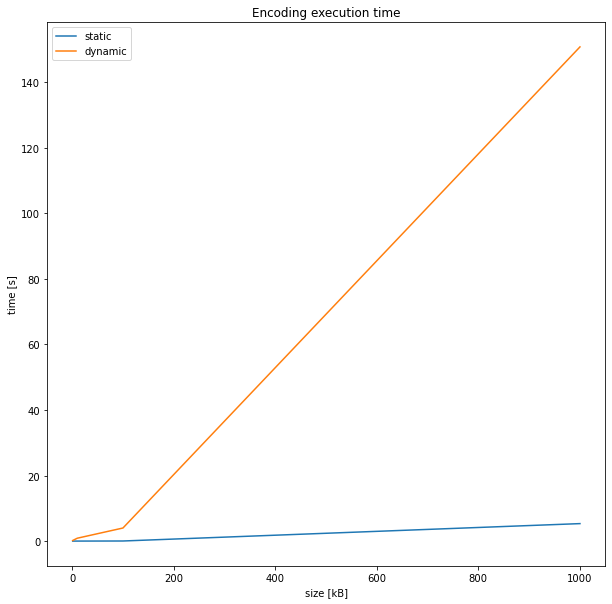

In [39]:
plt.figure(figsize=(10,10))
plt.xlabel('size [kB]')
plt.ylabel('time [s]')
plt.plot(sizes, static_e, label = "static")
plt.plot(sizes, dynamic_e, label = "dynamic")
plt.title("Encoding execution time")
plt.legend()
plt.show()

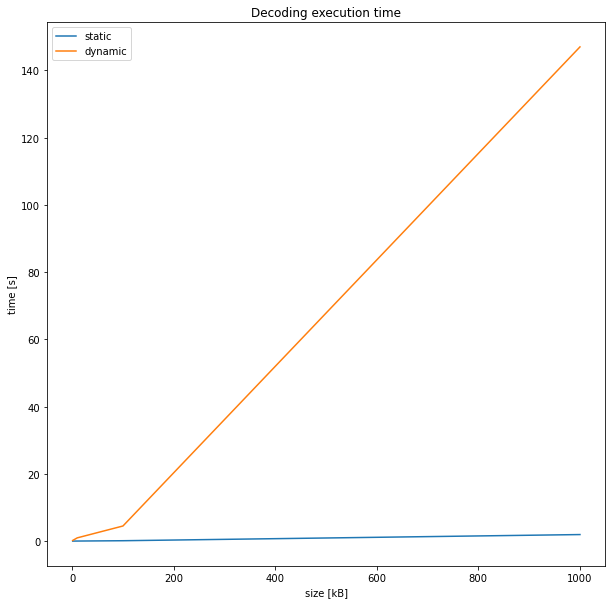

In [46]:
plt.figure(figsize=(10,10))
plt.xlabel('size [kB]')
plt.ylabel('time [s]')
plt.plot(sizes, static_d, label = "static")
plt.plot(sizes, dynamic_d, label = "dynamic")
plt.title("Decoding execution time")
plt.legend()
plt.show()

* Execution time of encoding/decoding with adaptive algorithm is much longer than static.
* Worst time of dynamic algorithm is caused probably by suboptimal implementation.
* in case of small files it occurs negative compression ratio.
* Compression ratio for Static Huffman coding constantly fluctuates around 45%